<a href="https://colab.research.google.com/github/NikhilKanamarla/ML-Practice/blob/master/PyTorchPractice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro to the torch tensor

In [4]:
import torch
#run terminal commands
!nvidia-smi
x = torch.empty(1)
z = torch.zeros(2,3)
print(x)
print(z)
#an array of data which runs well on the GPU
x = torch.Tensor([5,3])
print (x * x)
y = torch.zeros([2,5])
print(y)
#check size of tensor
print(y.shape)
#random initalization
y = torch.rand(2,5)
print(y)
#reshape tensor to fit input shape of neural network
y = y.view([1,10])
print(y.shape)

Tue Nov 24 17:35:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Data in PyTorch Part 1

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

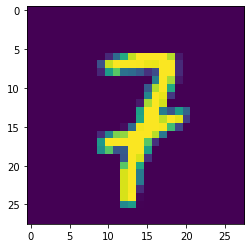

In [5]:
import torch
import torchvision
from torchvision import transforms, datasets

#get datasets using torchvision.datasets transforms are application applied to data (transforms conversion to tensors)
train = torchvision.datasets.MNIST("", train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
test = torchvision.datasets.MNIST("", train=False, download=True,transform=transforms.Compose([transforms.ToTensor()]))
#store in data loader, batch size is how many samples is passed through the model at once (in GPU memory), best batch size is between 8-64
#shuffling avoids feeding too much of one kind of image and leads to more generalization 
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)
#iterating over dataset, prints the batch of size 10 of tensor of tensors for images (image of digit) and then a tensor of tensors output of labels (digits) 
for data in trainset:
  print(data)
  break
#print an individual image and visualize 
x,y = data[0][0], data[1][0]
import matplotlib.pyplot as plt
#default shape doesn't work for matplotlib so we need to resize
print(x.shape)
plt.imshow(x.view(28,28))
#A dataset should be balanced such that every type of image is equally distributed and it avoid the model from cheating or overfitting 
total = 0
counter_imageType = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  x, y = data
  for y1 in y:
    counter_imageType[int(y1)] +=1
#gives distribution of images 
print("distribution of images", counter_imageType)

In [ ]:
#Building a machine learning model
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets

#neural network class
class Net(nn.Module):
  #intialize class
  def __init__(self):
    super().__init__()
    #feedforward neural network passes data from input layer to output layer
    #fully connected layer with input shape of 28*28 pixels (flatten image to one row) and output feature is size 64. Linear means flat layer
    self.fc1 = nn.Linear(28*28,64)
    #feed in data from fc1 to fc2
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    #output layer has input 64 and output of size 10 to represent 10 classes in MNIST
    self.fc4 = nn.Linear(64,10)
  #forward pass through the data 
  def forward(self, x):
    #relu is activation function and performs operation on input data
    #input and output dimenson of relu are the same
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    #softmax function gets probability distribution for each class adding up to 1 for output layer
    x = F.softmax(self.fc4(x), dim=1)
    return x

#declare a model
net = Net()
#print(net)
#passing in random data
x = torch.rand(28,28)
#resize to represent input shape (batch size, input x, input y)
x = x.view(-1,28,28)
#print(x)

#optmizer adjusts neural network based on error calculation
import torch.optim as optim 
#net.parameters() means all the adjustable parts of the neural network, learning rate is amount of change (we don't want model to swerve based on one train case)
optimizer = optim.Adam(net.parameters(),lr=0.001)

#full pass through data is epoch
EPOCHS = 3
for epoch in range(EPOCHS):
  #data is a batch of data in the training set
  for data in trainset:
    #split into features and labels
    features, labels = data
    #print(features, labels)
    #reset the gradient for next passes to avoid convoluting the results of multiple backpropogations  
    net.zero_grad()
    #pass data into network (make sure input shape matches)
    output = net(features.view(-1,28*28))
    #compute error (output,expected)
    loss = F.nll_loss(output,labels)
    print("loss is the ", loss)
    #backpropogate loss through trainiable parameters of model
    loss.backward()
    #adjust neural network
    optimizer.step()

Streaming output truncated to the last 5000 lines.
loss is the  tensor(-1.0000, grad_fn=<NllLossBackward>)
loss is the  tensor(-1.0000, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9997, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9989, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.8002, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9661, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.8996, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9330, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.6949, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9950, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.8995, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.8748, grad_fn=<NllLossBackward>)
loss is the  tensor(-1.0000, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9016, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9959, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.9989, grad_fn=<NllLossBackward>)
loss is the  tensor(-0.7990, grad_fn=<NllLossBackward